# Deep Learning for Computer Vision:  HW 3


## Computer Science: COMS W 4995 006


### Due: October 20, 2022

#### Problem

a) You are given two dimensional input from three separate classes. Your task is to implement a multi-layer perceptron (MLP) 3-class classifier with multiple hidden layers and a regularization on the weights. For the activiation function of the hidden units use ReLU or leaky ReLU. For the predictions use softmax on a linear output layer as we did in class. Your loss layer should compute $-\log P(y = i \,|{\bf x})$ where $i$ is the correct label according to the training data.

Implement each layer type (hidden, output, and loss) as separate python classes, each with methods for initialization, forward propagation, and backpropagation.

Implement a MLP as its own class, with separate methods for initialization, adding a layer, forward propagation, backpropagation, training and prediction. 

Let the layer dimensions be parameters passed when the network is created.

Let the number of training epochs, the mini-batch size, and the regularization parameter be parameters that are passed when training the network.

Build and run your network using your own constructs. The code for doing this might look like what is shown in the next box below.

b) Show the decision regions of the trained classifier by densely generating points in the plane and color coding these points with the three different labels. 

c) Repeat varying the number of hidden units (3, 8, 16), the number of hidden layers (1 and 3), and the regularization value (0 and some other value of your choosing).

d) Re-use this same network on any data of your own choosing. You can increase the dimensionality of the features space as you like. You can also change the number of classes to just two or more than three to align with your data. Separate your data into three piles: training, testing, and validation. Use your validation data to decide when to stop training if appropriate. Use your testing set to compute the accuracy of you classfier. 

In [904]:
#NN = MLP()
#NN.add_layer('Hidden', dim_in=2, dim_out=16)
#NN.add_layer('Hidden', dim_in=16, dim_out=16)
#NN.add_layer('Hidden', dim_in=16, dim_out=16)
#NN.add_layer('Output', dim_in=16, dim_out=3)
#NN.add_layer('Loss', dim_in=3, dim_out=3)
#
#loss = NN.train(X, y, epochs=100, bsize=8, alpha=0.0)
#plot_loss(loss)
#plot_decision_regions(NN)

 

#### NOTE:  Do not to use keras, tensorflow, pytorch, sklearn, etc. to do this.  You must build the machine learning components from scratch.  

#### YOUR CODE MUST BE YOUR OWN.
_______________________________________________________________



Let's start by importing some libraries.

In [905]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's make up our 2D data for our three classes.

In [906]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data.index)):
    x1 = random.randint(0,1)
    x2 = random.randint(0,1)
    if x1 == 1 and x2 == 0:
        y = 0
    elif x1 == 0 and x2 == 1:
        y = 0
    elif x1 == 0 and x2 == 0:
        y = 1
    else:
        y = 2 
    x1 = 1.0 * x1 + 0.20 * np.random.normal()
    x2 = 1.0 * x2 + 0.20 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y
    
for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)  
    data.iloc[k,0] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,2] = 1

for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)  
    data.iloc[k,0] = 0.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = -0.75 + 0.20 * np.random.normal()
    data.iloc[k,2] = 2
    
# Now let's normalize this data.
data.iloc[:,0] = (data.iloc[:,0] - data['x1'].mean()) / data['x1'].std()
data.iloc[:,1] = (data.iloc[:,1] - data['x2'].mean()) / data['x2'].std()
        
data.head()

x1        x2    y
0 -1.335201 -0.257396  1.0
1  0.703760  0.758596  2.0
2  1.427471  1.105121  1.0
3 -0.760297  0.620493  0.0
4 -0.175795 -1.259674  2.0

Let's message this data into a numpy format.

In [907]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X = np.matrix(X.values)
y = np.matrix(y.values)

Let's make a sloppy plotting function for our binary data.

In [908]:
# Sloppy function for plotting our data
def plot_data(X, y_predict):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    indices_0 = [k for k in range(0, X.shape[0]) if y_predict[k] == 0]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k] == 1]
    indices_2 = [k for k in range(0, X.shape[0]) if y_predict[k] == 2]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')
    ax.plot(X[indices_2, 0], X[indices_2,1], marker='o', linestyle='', ms=5, label='2')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Tricky 3 Class Classification')
    plt.show()

Now let's plot it.

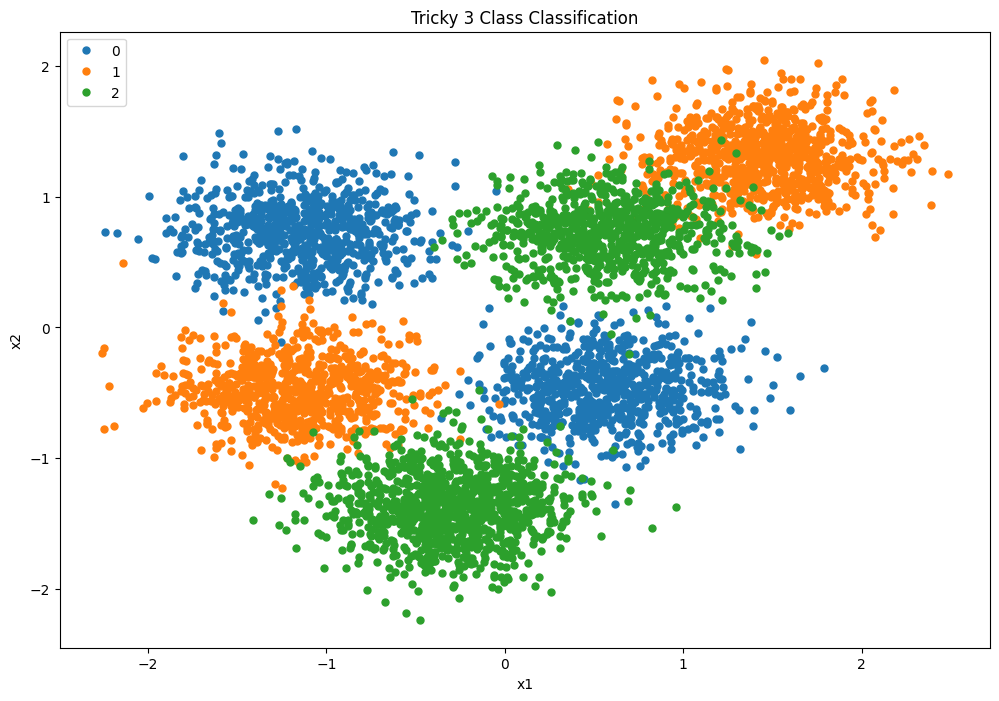

In [909]:
plot_data(X, y)

Now build your network. Good luck! 😉 

# (a) build classes and model

#### Hidden layer class: 
- create object: hidden_layer(activation_function, dim_in, dim_out)
- methods: 
    - initialize w and b 
    - relu, derivative of relu
    - forward propagation
    - backward propagation
    - update w and b

In [910]:
import math

In [911]:
class hidden_layer:
    # initialization: weight, bias, input_matrix, activation function
    def __init__(self, hidden_activation_function, dim_in, dim_out):
        self.hidden_activation_function = hidden_activation_function
        self.dim_in = dim_in
        self.dim_out = dim_out
        
    def initialize_w_b(self):
        self.w = np.random.randn(self.dim_in, self.dim_out)
        self.b = np.random.randn(self.dim_out, 1)
        
    # activation function
    def relu(self, x):
        return np.maximum(x, 0)
    
    # derivative of activation function
    def d_relu(self, Z):
        return Z > 0
        
    # forward prop
    def forward_prop(self, X):
        u1 = self.w.T.dot(X)
        u2 = u1 + self.b
        if (self.hidden_activation_function == "ReLU"):
            h = self.relu(u2)
        return u1, u2, h
        
    # backward prop (dim_out)
    def backward_prop(self, dLdu2, next_w, h, input_matrix, sample_size):
        dLdh = next_w.dot(dLdu2)
        # print(dLdu2.shape)
        # print(next_w.shape)
        # print(h.shape)
        # print(dLdh.shape)
        dLdu = np.array(dLdh) * np.array(self.d_relu(h))
        dLdb = dLdu
        avg_dLdb = np.sum(dLdb, axis = 1) / sample_size
        avg_dLdb = avg_dLdb.T
        self.db = avg_dLdb
        dLdw = dLdu.dot(input_matrix.T) # 3x2
        avg_dLdw = dLdw.T / sample_size # 2x3 same as W
        self.dw = avg_dLdw
        return dLdu
    
    def update_w_b(self, alpha):
        self.w = self.w - alpha*self.dw
        self.b = self.b - alpha*self.db.reshape(self.db.shape[0],1)

In [912]:
class output_layer:
    # initialization: output layer activation function (sigmoid), dim_in, dim_out
    def __init__(self, dim_in, dim_out):
        self.dim_in = dim_in
        self.dim_out = dim_out
        
    def initialize_w_b(self):
        self.w = np.random.randn(self.dim_in, self.dim_out)
        self.b = np.random.randn(self.dim_out, 1)
        
    def get_exponential(self, x):
        return np.exp(x)
    
    # get prediction: e^(zi) / sum(e^zj)
    def get_prediction_matrix(self, h):
        z = forward_prop(self.w, self.b, h)
        z_exp = get_exponential(z)
        z_sum = 1e-20 + np.sum(z_exp, axis = 0) # 1xn matrix = sum(e^zj)
        z_prob = z_exp / z_sum
        z_pred_index = np.argmax(z_prob, axis = 0)
        return z_pred_index
        
    # forward prop
    def forward_prop(self, h):
        u3 = self.w.T.dot(h)
        z = u3 + self.b
        return z
        
    # backward prop (dim_out) prop from z
    def backward_prop(self, dLdz, h, sample_size):
        dLdb = dLdz
        avg_dLdb = np.sum(dLdb, axis = 1) / sample_size
        self.db = avg_dLdb
        dLdu = dLdz
        dLdw = dLdu.dot(h.T)
        # print(dLdz.shape)
        # print(h.shape)
        # print(h)
        # print(dLdw.shape)
        avg_dLdw = dLdw.T / sample_size
        self.dw = avg_dLdw
        return dLdu
    
    def update_w_b(self, alpha):
        self.w = self.w - alpha*self.dw
        self.b = self.b - alpha*self.db.reshape(self.db.shape[0],1)
        

In [913]:
class loss_layer:
    # initialization: loss function (softmax), dim_in, dim_out
    def __init__(self, loss_function, dim_in, dim_out):
        self.loss_function = loss_function
        self.dim_in = dim_in
        self.dim_out = dim_out
        
    # get exponetial: e^(zi) 
    def get_exponential(self, x):
        return np.exp(x)
    
    def get_loss(self, z, y):
        # need y as index - as an list
        y = y.astype(int)
        y = y.tolist()
        y = y[0] # 1d list
        sample_size = len(y)
        # print(len(y))
        if (self.loss_function == "softmax"):
            # print(z)
            # e^(zj)
            z_exp = self.get_exponential(z)
            z_sum = 1e-20 + np.sum(z_exp, axis = 0) # 1xn matrix = sum(e^zj)
            # -zi+log(z_sum)
            # get zi matrix 1xn: from 3xn to 1xn using y
            z_i = np.zeros((1, sample_size))
            for i in range(sample_size):
                z_i[0,i] = z[y[i], i]
            # loss = -zi+log(z_sum)
            loss = -z_i + np.log(z_sum) # 1xn
            avg_loss = np.sum(loss, axis = 1) / loss[0].size
        return loss, avg_loss
    
    def backward_loss(self, z, y):
        # need y as index - as an list
        y = y.astype(int)
        y = y.tolist()
        y = y[0] # 1d list
        sample_size = len(y)
        # dLdz = -1(y=i)+e^zi/sum(e^zj)
        z_exp = self.get_exponential(z)
        z_sum = 1e-20 + np.sum(z_exp, axis = 0)
        dLdz = z_exp / z_sum
        for i in range(sample_size):
            dLdz[y[i], i] = -1 + dLdz[y[i], i]
        # print(dLdz.shape)
        return dLdz

In [914]:
# import LA for calculate L2 norm
from numpy import linalg as LA

In [915]:
# Implement a MLP as its own class, with separate methods for 
# initialization, adding a layer, forward propagation, backpropagation, training and prediction.
class MLP:
    # initialization: loss function (softmax), dim_in, dim_out
    def __init__(self):
        self.hidden_layer = []
        self.forward_input_matrix = []
    
    # add a layer and save them to the class
    def add_layer(self, layer_type, dim_in, dim_out):
        if (layer_type == 'Hidden'):
            h1 = hidden_layer("ReLU", dim_in, dim_out)
            h1.initialize_w_b()
            self.hidden_layer.append(h1)
        if (layer_type == "Output"):
            o1 = output_layer(dim_in, dim_out)
            o1.initialize_w_b()
            self.output_layer = o1
        if (layer_type == "Loss"):
            L1 = loss_layer("softmax", dim_in, dim_out)
            self.loss_layer = L1
    
    def forward_prop(self):
        i = 0
        for h in self.hidden_layer:
            u1, u2, h_outmatrix = h.forward_prop(self.forward_input_matrix[i])
            self.forward_input_matrix.append(h_outmatrix)
            i += 1
        self.z = self.output_layer.forward_prop(self.forward_input_matrix[i])
        # print(self.forward_input_matrix)
    
    # with regularization
    def get_loss(self, y):
        loss, avg_loss = self.loss_layer.get_loss(self.z, y)
        return avg_loss
    
    def backward_prop(self, y, sample_size, alpha):
        # backward prop loss layer
        dLdz = self.loss_layer.backward_loss(self.z, y)
        # backward prop output layer
        hidden_layer_num = len(self.hidden_layer)
        last_out = self.forward_input_matrix[hidden_layer_num]
        # print(last_out.shape)
        dLd_last_out = self.output_layer.backward_prop(dLdz, last_out, sample_size)
        # update output layer weight and bias, save them in next_w, and next_b for hidden layer backprop
        self.output_layer.update_w_b(alpha)
        next_w = self.output_layer.w
        next_b = self.output_layer.b
        # backward prop hidden layers
        for i in range(hidden_layer_num):
            current_out = self.forward_input_matrix[hidden_layer_num-i] #from last hidden layer output matrix
            current_in = self.forward_input_matrix[hidden_layer_num-i-1]
            # print(current_out.shape)
            current_h = self.hidden_layer[hidden_layer_num-1-i] # from last to first hidden layer
            # print(current_h.shape)
            dLd_last_out = current_h.backward_prop(dLd_last_out, next_w, current_out, current_in, sample_size)
            # update hidden layer weight and bias, save them
            current_h.update_w_b(alpha)
            next_w = current_h.w
            next_b = current_h.b
            
    def get_mini_batch(self, start_index, bsize, num_of_input, train_matrix):
        start = start_index
        end = start_index + bsize
        X_mini = train_matrix[start:end, :num_of_input]
        y_mini = train_matrix[start:end, num_of_input:]
        return X_mini, y_mini
            
    # Let the number of training epochs, 
    # the mini-batch size, and the regularization parameter 
    # be parameters that are passed when training the network.
    
    # X: nx2, y: nx1 --------- add regularization: reg_lambda ---------
    def train(self, X, y, num_of_input, epochs, bsize, alpha, reg_lambda):
        #y = y.astype(int) # change to integers - index
        k = 0
        loss_arr = []
        train_matrix = np.concatenate((X, y),axis=1)
        train_size = train_matrix[:, 0].size
        for i in range(epochs):
            # shuffle train_matrix for each epoch
            np.random.shuffle(train_matrix)
            for j in range(math.floor(train_size/bsize)):
                # get mini_batch
                X_mini, y_mini = self.get_mini_batch(j*bsize, bsize, num_of_input, train_matrix)
                #print(X_mini, y_mini)
                X_mini_T = X_mini.T # size: 2x500
                y_mini_T = y_mini.T # size: 1x500
                #print(y_mini_T.dtype)
                
                # initialize input
                self.forward_input_matrix = []
                self.forward_input_matrix.append(X_mini_T)
                
                # forward
                self.forward_prop()
                # print(self.forward_input_matrix)
                
                # get regularization term
                # reg_lambda * (L2(w1) + L2(w2) + ...)
                w_norm_arr = []
                # get L2 norm for weights in hidden layers
                for m in range(len(self.hidden_layer)):
                    w_norm = LA.norm(self.hidden_layer[m].w)
                    w_norm_arr.append(w_norm)
                # get L2 norm for weight in output layer
                w_norm = LA.norm(self.output_layer.w)
                w_norm_arr.append(w_norm)
                # print(w_norm_arr)
                reg_term = reg_lambda * sum(w_norm_arr)
                # print("here: ", reg_term)
                
                # get loss
                loss = self.get_loss(y_mini_T)
                loss_arr.append(loss[0,0] + reg_term)
                
                # backward
                self.backward_prop(y_mini_T, bsize, alpha)
                k += 1
                
        return k, loss_arr
    
    # X: nx2, y: nx1 --------- add regularization: reg_lambda ---------
    def train_with_early_stop(self, X, y, val_df, num_of_input, epochs, bsize, alpha, reg_lambda):
        #y = y.astype(int) # change to integers - index
        k = 0
        loss_arr = []
        val_acc = [] # validation set accuracy array
        val_size = len(val_df)
        train_matrix = np.concatenate((X, y),axis=1)
        train_size = train_matrix[:, 0].size
        for i in range(epochs):
            # shuffle train_matrix for each epoch
            np.random.shuffle(train_matrix)
            for j in range(math.floor(train_size/bsize)):
                # get mini_batch
                X_mini, y_mini = self.get_mini_batch(j*bsize, bsize, num_of_input, train_matrix)
                #print(X_mini, y_mini)
                X_mini_T = X_mini.T # size: 2x500
                y_mini_T = y_mini.T # size: 1x500
                #print(y_mini_T.dtype)
                
                # initialize input
                self.forward_input_matrix = []
                self.forward_input_matrix.append(X_mini_T)
                
                # forward
                self.forward_prop()
                # print(self.forward_input_matrix)
                
                # get regularization term
                # reg_lambda * (L2(w1) + L2(w2) + ...)
                w_norm_arr = []
                # get L2 norm for weights in hidden layers
                for m in range(len(self.hidden_layer)):
                    w_norm = LA.norm(self.hidden_layer[m].w)
                    w_norm_arr.append(w_norm)
                # get L2 norm for weight in output layer
                w_norm = LA.norm(self.output_layer.w)
                w_norm_arr.append(w_norm)
                # print(w_norm_arr)
                reg_term = reg_lambda * sum(w_norm_arr)
                # print("here: ", reg_term)
                
                # get loss
                loss = self.get_loss(y_mini_T)
                loss_arr.append(loss[0,0] + reg_term)
                
                # get validation set prediction
                self.predict(val_df, num_of_input)  # val_df: n*input+output
                # get validation set accuracy
                curr_val_acc = self.get_accuracy(val_size)
                
                #if (curr_val_acc > 0.8):# if accuracy is greater than last accuracy, continue training
                if (len(val_acc) == 0) :
                    decrease_n = 0
                    val_acc.append(curr_val_acc)
                else:
                    # print(curr_val_acc)
                    if (val_acc[len(val_acc)-1] < curr_val_acc):
                        decrease_n = 0
                        val_acc.append(curr_val_acc)
                    # if not, end training
                    else:
                        if (decrease_n > 10):
                            k+=1
                            val_acc.append(curr_val_acc)
                            return k, loss_arr, val_acc
                        else:
                            decrease_n += 1
                            val_acc.append(curr_val_acc)
            
                
                # backward
                self.backward_prop(y_mini_T, bsize, alpha)
                k += 1
                
        return k, loss_arr, val_acc
    
    
    def predict(self, data_df, num_of_input):
        self.forward_input_matrix = []
        self.pred = data_df.copy(deep=True)
        data_matrix = data_df.iloc[: , :num_of_input].to_numpy().T # size 2xn
        # initialize as the input data matrix
        self.forward_input_matrix.append(data_matrix)
        
        # predict with trained w and b
        self.forward_prop()
        # max zj is the predicted class
        z = np.argmax(self.z, axis =0)
        z = np.matrix(z)
        #print(z.shape)
        #print(self.z.shape)
        z = np.squeeze(np.asarray(z[0,:]))
        self.pred["class"] = z.tolist()
    
    def get_accuracy(self, sample_size):
        return np.sum(self.pred["class"] == self.pred["y"]) / sample_size

In [916]:
# plot loss per iteration
def plot_loss(k, loss_arr):
    x = np.arange(k)
    x = x+1 # iteration from 1 to k
    # loss_val: 1xk array
    plt.plot(x, loss_arr)
    plt.title('Loss')
    plt.xlabel('Number of iterations')
    plt.ylabel('Average loss')
    plt.show()

In [917]:
def plot_decision_regions(nn, num_hidden_layer):
    # generate meshgrid
    x_axis = np.linspace(-2.5,2.5,100)
    y_axis = np.linspace(-2.2,2.2,100)
    # a meshgrid of points
    comb_array = np.array(np.meshgrid(x_axis, y_axis)).T.reshape(-1, 2)
    # df with 3 columns
    df_random = pd.DataFrame(comb_array, columns=['x1','x2'])
    
    # predict for the meshgrid
    nn.predict(df_random, 2)
    df = nn.pred

    # assign a class to each point using the classifier
    colors = {2: "green", 1: "orange", 0: 'blue'}
    # meshgrid points -> decision boundary
    plt.scatter(df['x1'], df['x2'], s=1, c=df['class'].map(colors))
    plt.xlabel('x1')
    plt.ylabel('x2')
    #num_hidden_nodes = []
    #for i in range(num_hidden_layer):
    #    h = nn.hidden_layer.dim_out
    #    num_hidden_nodes.append(h)
    plt.title('Result from training with '+str(num_hidden_layer)+' hidden layer')

    plt.show()

Now we can train our model with the given sample data

In [919]:
# get data shape
print(X.shape)
print(y.shape)

(5000, 2)
(5000, 1)


In [920]:
# Prepare data
# concatenate data into dataframe
data_df = np.concatenate((X, y),axis=1)
# shuffle data
np.random.shuffle(data_df)
#data_df = pd.DataFrame(data_df, columns = ['x1','x2','y'])
# split train, test set
n = data_df.shape[0]
num_of_input = X.shape[1]
train_size = np.floor(n*0.8).astype(int)
train_matrix = data_df[:train_size, :]
test_matrix = data_df[train_size:, :]
X_train = train_matrix[:, :num_of_input]
y_train = train_matrix[:, num_of_input:]
X_test = test_matrix[:, :num_of_input]
y_test = test_matrix[:, num_of_input:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 2) (4000, 1) (1000, 2) (1000, 1)


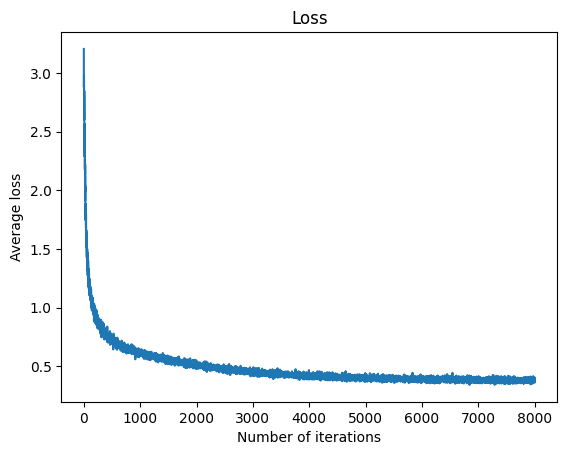

In [861]:
# Initialize our MLP model
NN = MLP()
NN.add_layer('Hidden', dim_in=2, dim_out=16)
NN.add_layer('Output', dim_in=16, dim_out=3)
NN.add_layer('Loss', dim_in=3, dim_out=3)

k, loss_arr = NN.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.015)
plot_loss(k, loss_arr)

# (b) Show the decision boundary from prediction

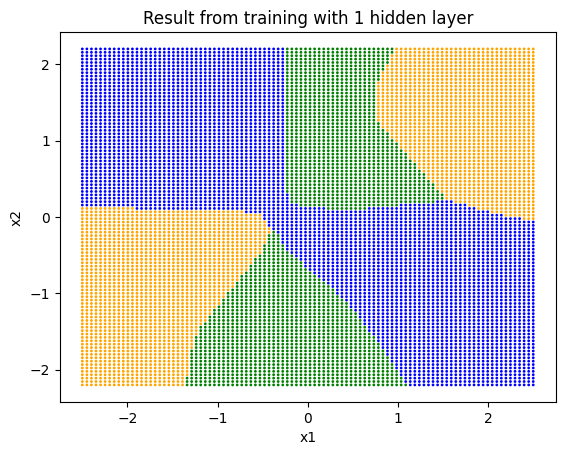

In [862]:
plot_decision_regions(NN, 1)

# (c) Repeat varying the number of hidden units (3, 8, 16), the number of hidden layers (1 and 3), and the regularization value (0 and some other value of your choosing).

1 Hidden Layer with 3 Hidden Nodes and 0.0 Regularization


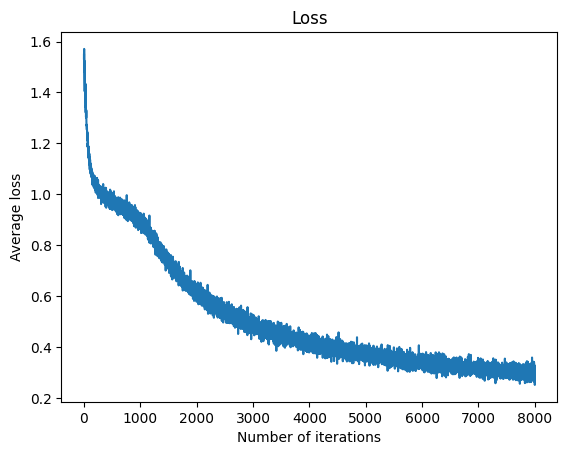

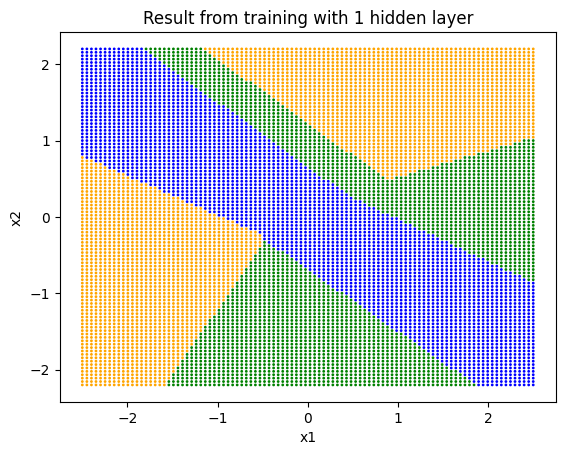

In [863]:
# 1 hidden layer with 3 hidden nodes
NN1_3 = MLP()
NN1_3.add_layer('Hidden', dim_in=2, dim_out=3)
NN1_3.add_layer('Output', dim_in=3, dim_out=3)
NN1_3.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN1_3.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.0)
print("1 Hidden Layer with 3 Hidden Nodes and 0.0 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN1_3, 1)

1 Hidden Layer with 3 Hidden Nodes and 0.015 Regularization


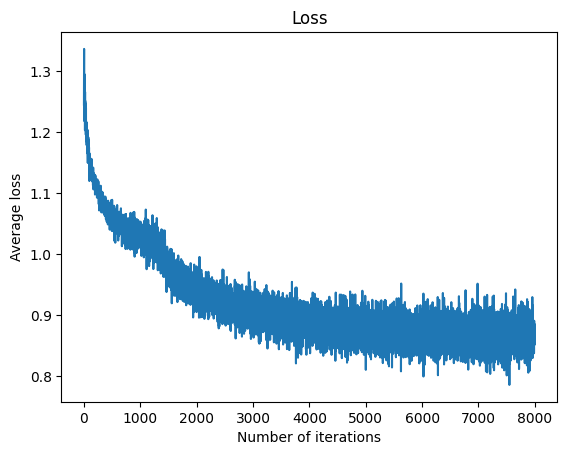

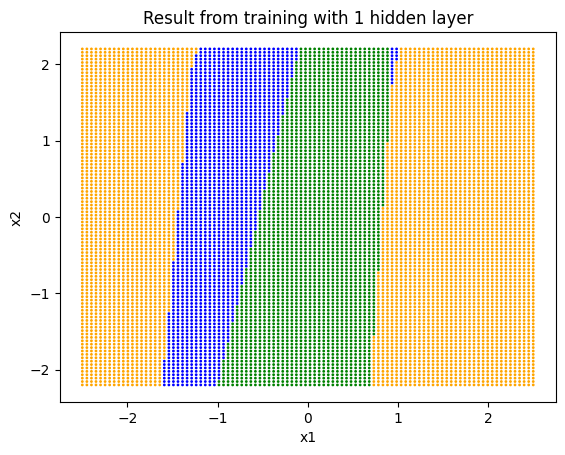

In [864]:
# 1 hidden layer with 3 hidden nodes
NN1_31 = MLP()
NN1_31.add_layer('Hidden', dim_in=2, dim_out=3)
NN1_31.add_layer('Output', dim_in=3, dim_out=3)
NN1_31.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN1_31.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.015)
print("1 Hidden Layer with 3 Hidden Nodes and 0.015 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN1_31, 1)

The one with 0.015 regularization has worse loss convergence than the one with 0.0 regularization 

1 Hidden Layer with 8 Hidden Nodes and 0.0 Regularization


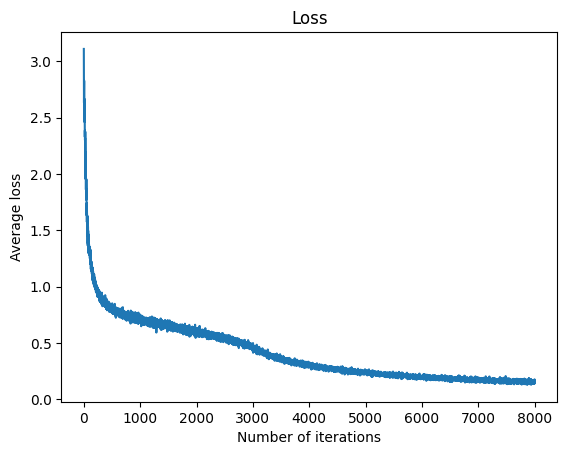

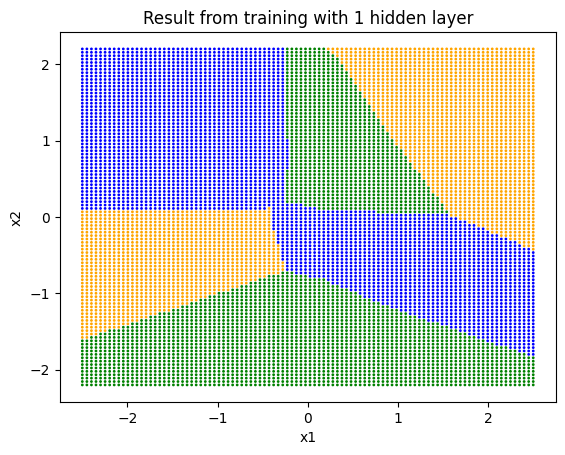

In [865]:
# 1 hidden layer with 8 hidden nodes
NN1_8 = MLP()
NN1_8.add_layer('Hidden', dim_in=2, dim_out=8)
NN1_8.add_layer('Output', dim_in=8, dim_out=3)
NN1_8.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN1_8.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.0)
print("1 Hidden Layer with 8 Hidden Nodes and 0.0 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN1_8, 1)

1 Hidden Layer with 8 Hidden Nodes and 0.015 Regularization


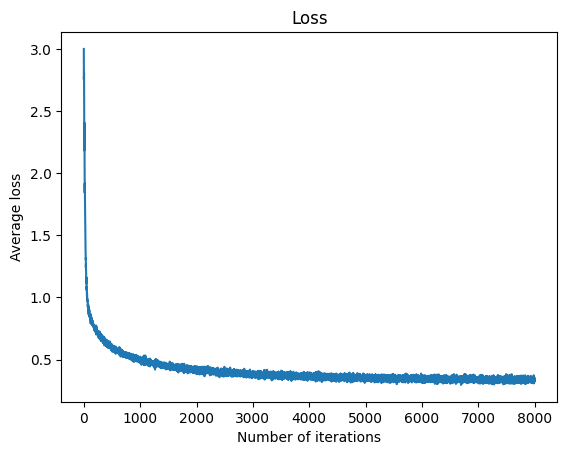

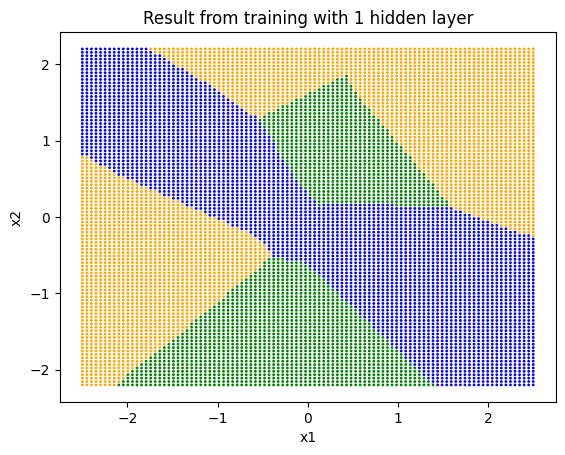

In [866]:
# 1 hidden layer with 8 hidden nodes
NN1_81 = MLP()
NN1_81.add_layer('Hidden', dim_in=2, dim_out=8)
NN1_81.add_layer('Output', dim_in=8, dim_out=3)
NN1_81.add_layer('Loss', dim_in=3, dim_out=3)

# 0.015 regularization
k, loss_arr = NN1_81.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.015)
print("1 Hidden Layer with 8 Hidden Nodes and 0.015 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN1_81, 1)

1 Hidden Layer with 16 Hidden Nodes and 0.0 Regularization


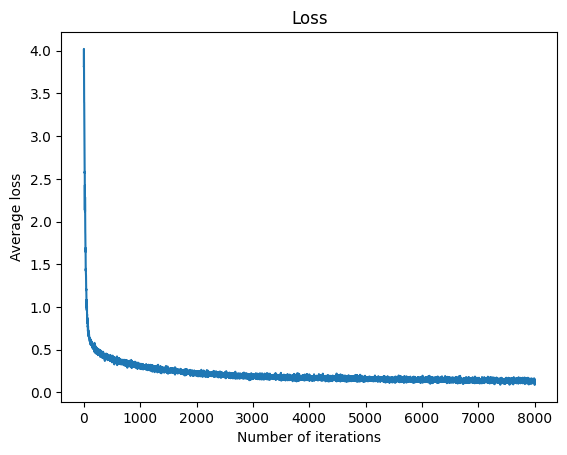

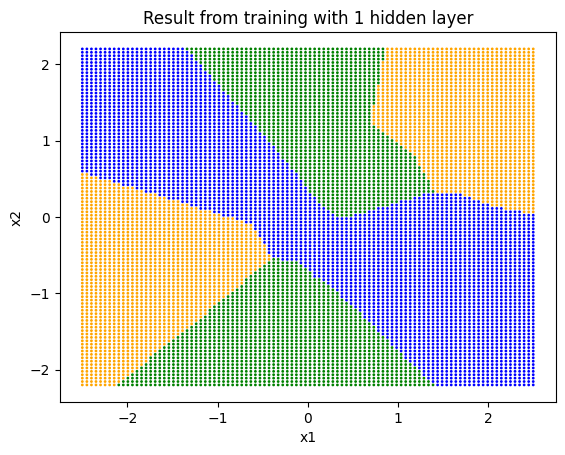

In [867]:
# 1 hidden layer with 16 hidden nodes
NN1_16 = MLP()
NN1_16.add_layer('Hidden', dim_in=2, dim_out=16)
NN1_16.add_layer('Output', dim_in=16, dim_out=3)
NN1_16.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN1_16.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.0)
print("1 Hidden Layer with 16 Hidden Nodes and 0.0 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN1_16, 1)

1 Hidden Layer with 16 Hidden Nodes and 0.015 Regularization


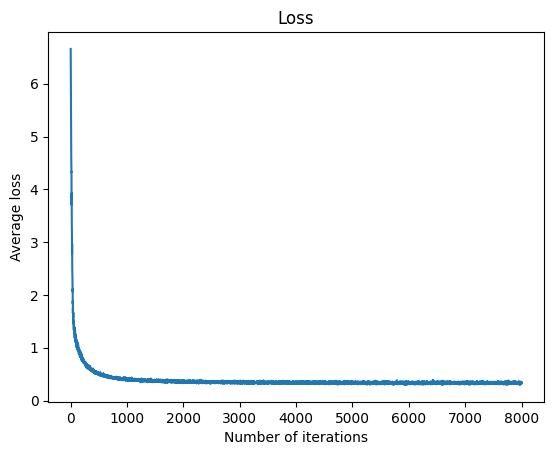

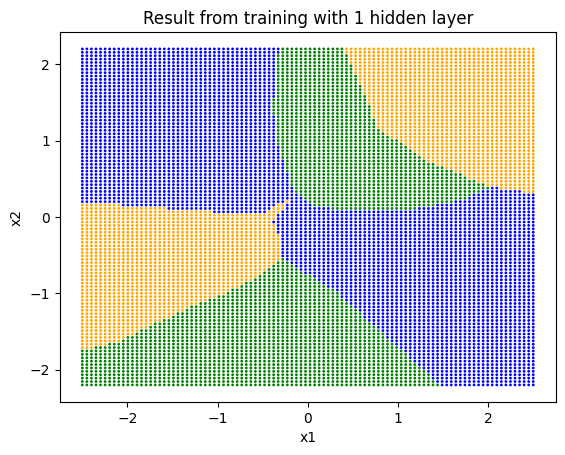

In [868]:
# 1 hidden layer with 16 hidden nodes
NN1_161 = MLP()
NN1_161.add_layer('Hidden', dim_in=2, dim_out=16)
NN1_161.add_layer('Output', dim_in=16, dim_out=3)
NN1_161.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN1_161.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.015)
print("1 Hidden Layer with 16 Hidden Nodes and 0.015 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN1_161, 1)

3 Hidden Layer with 3, 3, 3 Hidden Nodes and 0.0 Regularization


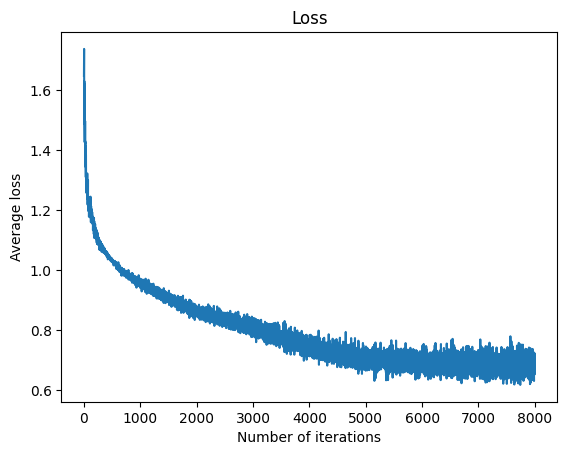

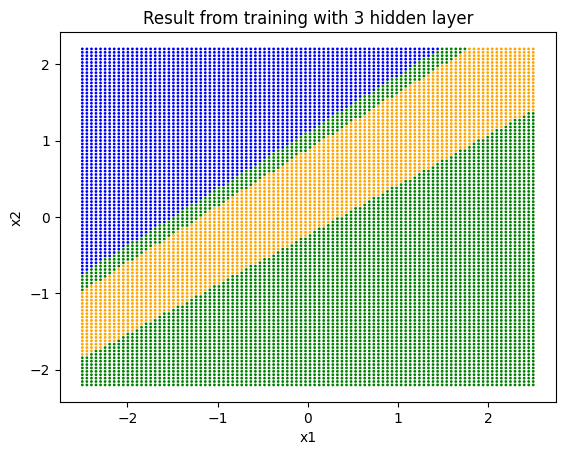

In [869]:
# 3 hidden layer with 3, 3, 3 hidden nodes
NN3_333 = MLP()
NN3_333.add_layer('Hidden', dim_in=2, dim_out=3)
NN3_333.add_layer('Hidden', dim_in=3, dim_out=3)
NN3_333.add_layer('Hidden', dim_in=3, dim_out=3)
NN3_333.add_layer('Output', dim_in=3, dim_out=3)
NN3_333.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN3_333.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.0)
print("3 Hidden Layer with 3, 3, 3 Hidden Nodes and 0.0 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN3_333, 3)

3 Hidden Layer with 3, 3, 3 Hidden Nodes and 0.015 Regularization


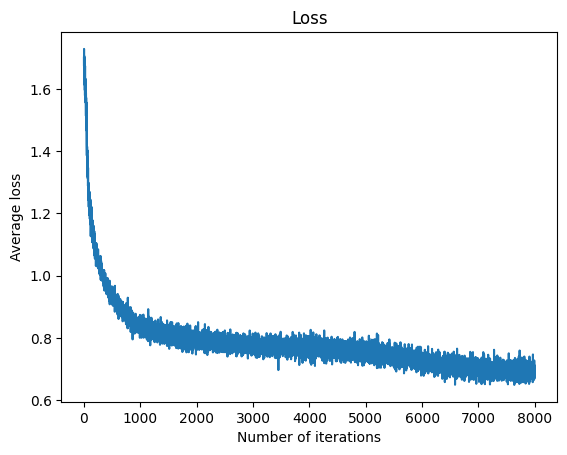

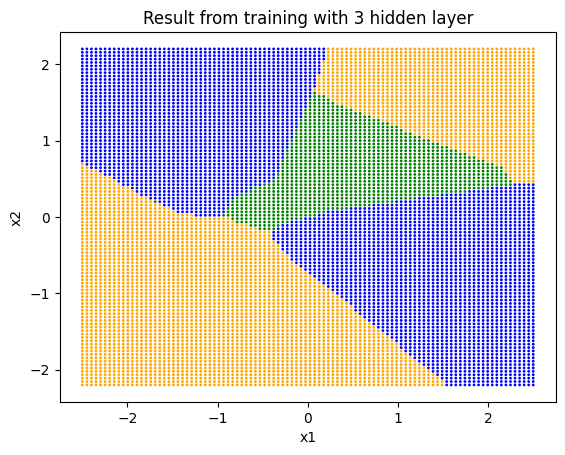

In [870]:
# 3 hidden layer with 3, 3, 3 hidden nodes
NN3_3331 = MLP()
NN3_3331.add_layer('Hidden', dim_in=2, dim_out=3)
NN3_3331.add_layer('Hidden', dim_in=3, dim_out=3)
NN3_3331.add_layer('Hidden', dim_in=3, dim_out=3)
NN3_3331.add_layer('Output', dim_in=3, dim_out=3)
NN3_3331.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN3_3331.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.015)
print("3 Hidden Layer with 3, 3, 3 Hidden Nodes and 0.015 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN3_3331, 3)

3 Hidden Layer with 3, 8, 16 Hidden Nodes and 0.0 Regularization


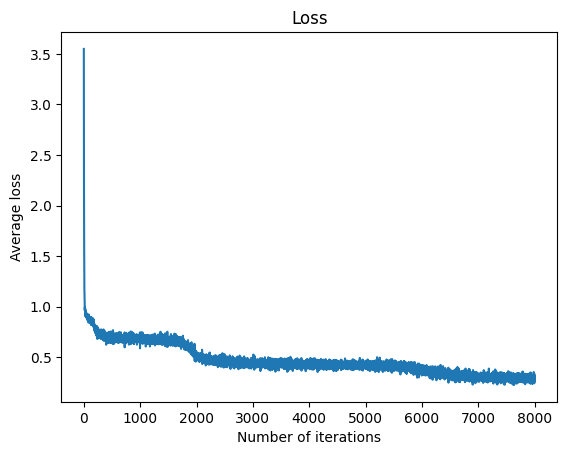

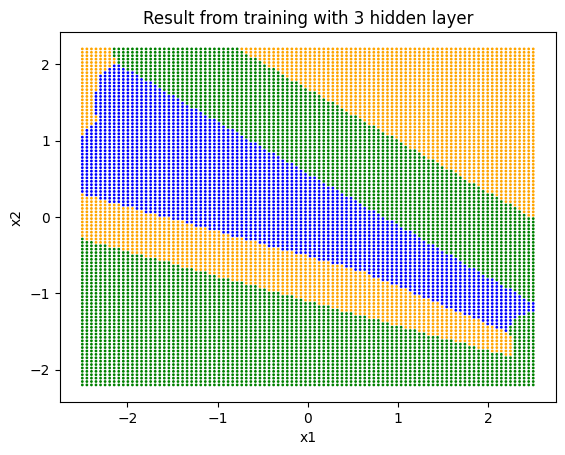

In [871]:
# 3 hidden layer with 3, 8, 16 hidden nodes
NN3_3816 = MLP()
NN3_3816.add_layer('Hidden', dim_in=2, dim_out=3)
NN3_3816.add_layer('Hidden', dim_in=3, dim_out=8)
NN3_3816.add_layer('Hidden', dim_in=8, dim_out=16)
NN3_3816.add_layer('Output', dim_in=16, dim_out=3)
NN3_3816.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN3_3816.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.0)
print("3 Hidden Layer with 3, 8, 16 Hidden Nodes and 0.0 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN3_3816, 3)

3 Hidden Layer with 3, 16, 16 Hidden Nodes and 0.015 Regularization


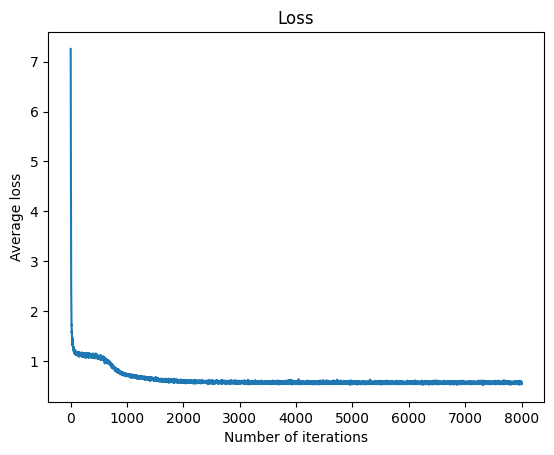

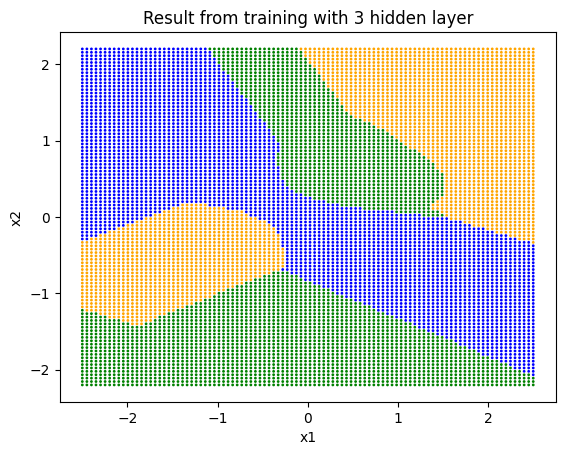

In [872]:
# 3 hidden layer with 3, 16, 16 hidden nodes
NN3_166 = MLP()
NN3_166.add_layer('Hidden', dim_in=2, dim_out=3)
NN3_166.add_layer('Hidden', dim_in=3, dim_out=16)
NN3_166.add_layer('Hidden', dim_in=16, dim_out=16)
NN3_166.add_layer('Output', dim_in=16, dim_out=3)
NN3_166.add_layer('Loss', dim_in=3, dim_out=3)

# 0 regularization
k, loss_arr = NN3_166.train(X_train, y_train, num_of_input=2, epochs=1000, bsize=500, alpha=0.01, reg_lambda=0.015)
print("3 Hidden Layer with 3, 16, 16 Hidden Nodes and 0.015 Regularization")
plot_loss(k, loss_arr)
plot_decision_regions(NN3_166, 3)

# d) Re-use this same network on any data of your own choosing. You can increase the dimensionality of the features space as you like. You can also change the number of classes to just two or more than three to align with your data. Separate your data into three piles: training, testing, and validation. Use your validation data to decide when to stop training if appropriate. Use your testing set to compute the accuracy of you classfier.

In [873]:

# add early stop


In [921]:
train_path = "data/mnist/mnist_train.csv"
test_path = "data/mnist/mnist_test.csv"
mnist_train_df = pd.read_csv(train_path)
mnist_test_df = pd.read_csv(test_path)

In [922]:
mnist_y_train_df = mnist_train_df[['label']]
mnist_X_train_df = mnist_train_df.drop(columns = ['label'])
mnist_y_test_df = mnist_test_df[['label']]
mnist_X_test_df = mnist_test_df.drop(columns = ['label'])
print(mnist_X_train_df.head())
print(mnist_X_test_df.head())

   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    

In [923]:
# normalize each column values
mnist_X_train_df = mnist_X_train_df.div(mnist_X_train_df.sum(axis=1), axis=0)
mnist_train_df = pd.concat([mnist_y_train_df, mnist_X_train_df], axis=1)
print(mnist_train_df.head())
mnist_X_test_df = mnist_X_test_df.div(mnist_X_test_df.sum(axis=1), axis=0)
mnist_test_df = pd.concat([mnist_y_test_df, mnist_X_test_df], axis=1)
print(mnist_test_df.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4      9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1      

In [924]:
print(mnist_train_df.shape)
print(mnist_test_df.shape)

(60000, 785)
(10000, 785)


In [925]:
# train matrix
mnist_train_arr = pd.DataFrame.to_numpy(mnist_train_df)
np.random.shuffle(mnist_train_arr)
mnist_X_train_arr = np.matrix(mnist_train_arr[:, 1:])
mnist_y_train_arr = np.matrix(mnist_train_arr[:, :1])
print(mnist_X_train_arr.shape, mnist_y_train_arr.shape)

(60000, 784) (60000, 1)


In [926]:
# test matrix
mnist_test_arr = pd.DataFrame.to_numpy(mnist_test_df)
np.random.shuffle(mnist_test_arr)
n = len(mnist_test_arr)
mnist_X_test_arr = np.matrix(mnist_test_arr[:math.floor(n*0.5), 1:])
mnist_y_test_arr = np.matrix(mnist_test_arr[:math.floor(n*0.5), :1])
mnist_val_arr = np.matrix(mnist_test_arr[math.floor(n*0.5):, :])
print(mnist_X_test_arr.shape, mnist_X_val_arr.shape)

(5000, 784) (5000, 784)


In [927]:
column_names = []
for col in mnist_test_df:
    if (col == "label"):
        column_names.append("y")
    else:
        column_names.append(col)
validation_df = pd.DataFrame(mnist_val_arr, columns = column_names)
cols = column_names[1:] + column_names[:1]
validation_df = validation_df[cols]
validation_df.head()

1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x20  28x21  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

   28x22  28x23  28x24  28x25  28x26  28x27  28x28    y  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  9.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  6.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  5.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  9.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  8.0  

[5 rows x 785 columns]

In [933]:
# train model: input 4 features, classify to 3 classes (0,1,2)
# 1 hidden layer with 16 hidden nodes
NN_m = MLP()
NN_m.add_layer('Hidden', dim_in=784, dim_out=16)
NN_m.add_layer('Hidden', dim_in=16, dim_out=16)
NN_m.add_layer('Output', dim_in=16, dim_out=10)
NN_m.add_layer('Loss', dim_in=10, dim_out=10)

# 0.015 regularization
#k, loss_arr = NN_m.train(mnist_X_train_arr, mnist_y_train_arr, num_of_input=784, epochs=100, bsize=1000, alpha=0.01, reg_lambda=0.015)
# k, loss_arr, val_arr = NN_m.train_with_early_stop(mnist_X_train_arr, mnist_y_train_arr, validation_df, num_of_input=784, epochs=100, bsize=1000, alpha=0.01, reg_lambda=0.015)
# print("1 Hidden Layer with 16 Hidden Nodes and 0.015 Regularization")
# print(k, len(loss_arr))
#plot_loss(k, loss_arr)
# lot_loss(k-1, val_arr)
# plot_decision_regions(NN_wine, 11)

In [932]:
NN_m.predict(validation_df, 784)
acc = NN_m.get_accuracy(5000)
print(acc)

0.4174


In [ ]:
k, loss_arr, val_arr = NN_m.train_with_early_stop(mnist_X_train_arr, mnist_y_train_arr, validation_df, num_of_input=784, epochs=10, bsize=1000, alpha=0.01, reg_lambda=0.015)
plot_loss(k, loss_arr)
print(len(val_arr))